In [1]:
# Load the required libraries
import nltk
import spacy
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\abdul\anaconda3\envs\tf2x\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\abdul\anaconda3\envs\tf2x\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\abdul\anaconda3\envs\tf2x\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
nltk.download('averaged_perceptron_tagger')

# Load the English language model
nlp = spacy.load('en_core_web_sm')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1108)>


In [3]:
# Load the dataset
data = pd.read_csv('dataset/all-data.csv', encoding='ISO-8859-1', names=['label', 'text'])
data.columns

Index(['label', 'text'], dtype='object')

<AxesSubplot:>

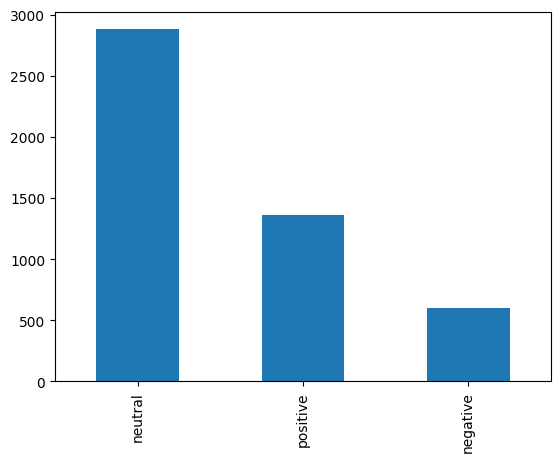

In [4]:
X = data['text']
y = data['label']

y.value_counts().plot(kind='bar')

In [5]:
# initialize a LabelEncoder object
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = list(le.classes_)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

In [7]:
# Preprocess the text data and extract features using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_train_feat = tfidf.fit_transform(X_train)
X_test_feat = tfidf.transform(X_test)

In [8]:
from sklearn.svm import SVC

In [9]:
# Train the SVM model
model = SVC(kernel='poly')
model.fit(X_train_feat, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test_feat)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_names)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(report)

Accuracy: 0.7010309278350515
Precision: 0.7618369265966787
Recall: 0.7010309278350515
F1 Score: 0.6474616404820546
              precision    recall  f1-score   support

    negative       0.93      0.21      0.35       122
     neutral       0.67      0.99      0.80       570
    positive       0.87      0.31      0.46       278

    accuracy                           0.70       970
   macro avg       0.82      0.51      0.54       970
weighted avg       0.76      0.70      0.65       970



In [11]:
# Perform POS tagging on the text data
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)
    return [pos for _, pos in nltk.pos_tag(tokens)]

X_train_tags = [pos_tagging(tweet_text) for tweet_text in X_train]
X_test_tags = [pos_tagging(tweet_text) for tweet_text in X_test]

In [12]:
# Combine the text data and POS tags
X_train_combined = []
for i in range(len(X_train)):
    combined = list(X_train)[i] + " " + " ".join(X_train_tags[i])
    X_train_combined.append(combined)

X_test_combined = []
for i in range(len(X_test)):
    combined = list(X_test)[i] + " " + " ".join(X_test_tags[i])
    X_test_combined.append(combined)

In [13]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train_combined)
X_test_tfidf = vectorizer.transform(X_test_combined)

In [14]:
# Train the SVM model
model = SVC(kernel='poly')
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test_tfidf)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7360824742268042
Precision: 0.7550369968557342
Recall: 0.7360824742268042
F1 Score: 0.7052130103206541


In [16]:
# Process the dataset using the spaCy language model
def extract_morphology(reviews):
    data = []
    for review in reviews:
        doc = nlp(review)
        lemma_list = [token.lemma_ for token in doc if not token.is_stop]
        pos_list = [token.pos_ for token in doc if not token.is_stop]
        processed_review = " ".join([lemma + "_" + pos for lemma, pos in zip(lemma_list, pos_list)])
        data.append(processed_review)
    return data

train_data = extract_morphology(X_train)
test_data = extract_morphology(X_test)

In [18]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(train_data)
X_test_tfidf = tfidf.transform(test_data)

In [19]:
# Train the SVM model
model = SVC(kernel='poly')
model.fit(X_train_tfidf, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test_tfidf)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6845360824742268
Precision: 0.7048846485408022
Recall: 0.6845360824742268
F1 Score: 0.6295278675434572


<AxesSubplot:>

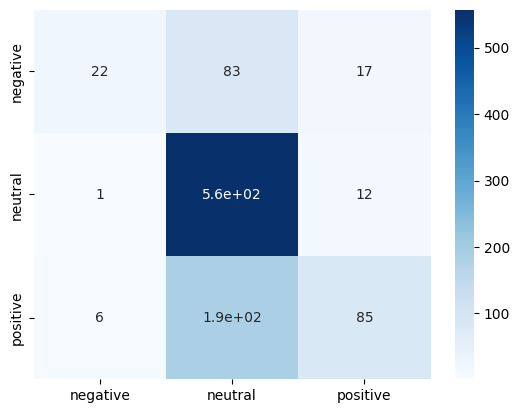

In [21]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)